## Data Augmentationm

### torchvision.transforms

In [28]:
from torchvision import transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

In [18]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.RandomRotation(30),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [21]:
# dataset
train_dataset = CIFAR10(root='/cifar10_data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=2)

Files already downloaded and verified


In [20]:
im, label = train_dataset[0]

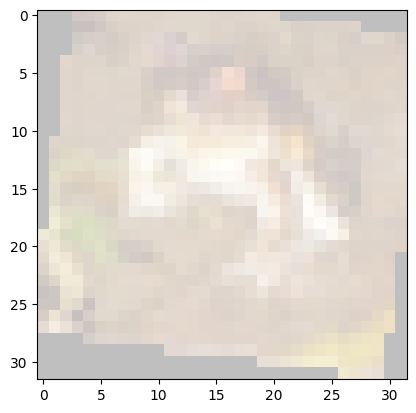

In [17]:
# imを0~1に変換して可視化
im = im / 2 + 0.5
im.shape
plt.imshow(im.permute(1, 2, 0))

In [32]:
X, y = next(iter(train_loader))
X.shape

torch.Size([4, 3, 32, 32])

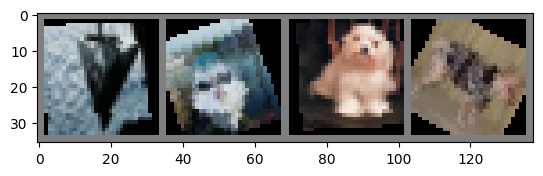

In [33]:
# Xを描画する
X = make_grid(X).permute(1, 2, 0)
# print(X.min(), X.max())
X = X / 2 + 0.5
plt.imshow(X)



## Albumentations

In [36]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2

In [37]:
A.Compose[(
    A.HorizontalFlip(p=0.5),
    A.PadIfNeeded(min_height=40, min_width=40, border_mode=cv2.BORDER_CONSTANT), # 指定したサイズになるようpadding追加
    A.RandomCrop(height=32, width=32),
    A.Rotate(limit=30, border_mode=cv2.BORDER_CONSTANT),
    ToTensorV2()
    A.
)]

TypeError: 'SerializableMeta' object is not subscriptable